In [194]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [195]:
titanic = sns.load_dataset('./titanic')

In [196]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [198]:
titanic.drop_duplicates(inplace=True)

In [199]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135204
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002551
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.742347
embark_town    0.002551
alive          0.000000
alone          0.000000
dtype: float64

In [200]:
titanic.dropna(subset=["embarked","embark_town"],inplace=True)

In [201]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135550
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.744246
embark_town    0.000000
alive          0.000000
alone          0.000000
dtype: float64

In [202]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          676 non-null    float64
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   embarked     782 non-null    object 
 8   class        782 non-null    object 
 9   who          782 non-null    object 
 10  adult_male   782 non-null    bool   
 11  deck         200 non-null    object 
 12  embark_town  782 non-null    object 
 13  alive        782 non-null    object 
 14  alone        782 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 87.1+ KB


In [203]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
468,0,3,male,NaN,0,0,7.7250,Q,Third,man,True,NaN,Queenstown,no,True
530,1,2,female,2.0,1,1,26.0000,S,Second,child,False,NaN,Southampton,yes,False
188,0,3,male,40.0,1,1,15.5000,Q,Third,man,True,NaN,Queenstown,no,False
337,1,1,female,41.0,0,0,134.5000,C,First,woman,False,E,Cherbourg,yes,True
205,0,3,female,2.0,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
457,1,1,female,NaN,1,0,51.8625,S,First,woman,False,D,Southampton,yes,False
762,1,3,male,20.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
860,0,3,male,41.0,2,0,14.1083,S,Third,man,True,NaN,Southampton,no,False
830,1,3,female,15.0,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False


In [204]:
titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [205]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [206]:
titanic.drop(columns=['alive','who'],inplace=True)

In [207]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
719,0,3,male,33.0,0,0,7.7750,S,Third,True,NaN,Southampton,True
58,1,2,female,5.0,1,2,27.7500,S,Second,False,NaN,Southampton,False
247,1,2,female,24.0,0,2,14.5000,S,Second,False,NaN,Southampton,False
404,0,3,female,20.0,0,0,8.6625,S,Third,False,NaN,Southampton,True
447,1,1,male,34.0,0,0,26.5500,S,First,True,NaN,Southampton,True


In [208]:
titanic["deck"].value_counts(),titanic["embark_town"].value_counts(),titanic["sex"].value_counts(),titanic["adult_male"].value_counts()

(deck
 C    59
 B    44
 D    33
 E    32
 A    15
 F    13
 G     4
 Name: count, dtype: int64,
 embark_town
 Southampton    568
 Cherbourg      155
 Queenstown      59
 Name: count, dtype: int64,
 sex
 male      491
 female    291
 Name: count, dtype: int64,
 adult_male
 True     451
 False    331
 Name: count, dtype: int64)

##### So, in adult_male column, false value, there is female counts too !  

In [209]:
titanic["age"] = titanic["age"].fillna(0)

##### just checking to plot the bar graph between gender and age ! so that i can have a clear view on how age is divided with gender.

In [210]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
adult_male       0
deck           582
embark_town      0
alone            0
dtype: int64

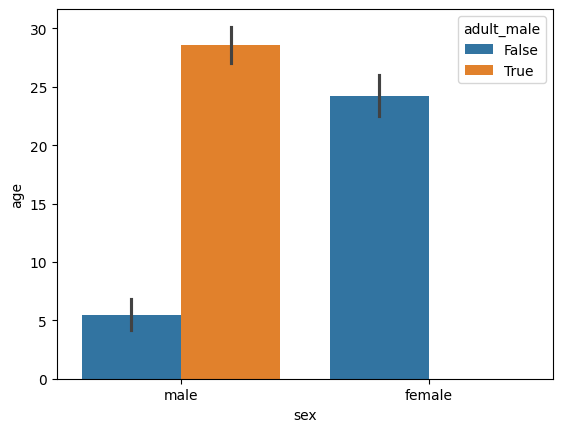

In [211]:
sns.barplot(data=titanic,y="age",x="sex",hue="adult_male")
plt.show()

##### Okay , so we will add a custom logic, 
<p>If, adult_male = True, then we will take the age column with value greater than 18 and fill only those column where adult_male = True with mean ! </p></br>
<p>If, adult_male = False and Sex=Female then we will take the age column corresponding to female sex column and generate the mean and if adult_male = False and sex=Male then we will take the age column corresponding to male sex column and generate the mean of it ! </p>
<p>Right now, we have replaced null value with 0, so we need to create a function to replace 0 with a valid age </p>

In [212]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          782 non-null    float64
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   embarked     782 non-null    object 
 8   class        782 non-null    object 
 9   adult_male   782 non-null    bool   
 10  deck         200 non-null    object 
 11  embark_town  782 non-null    object 
 12  alone        782 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 74.8+ KB


In [213]:
titanic[titanic["adult_male"]==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
5,0,3,male,0.0,0,0,8.4583,Q,Third,True,NaN,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,S,First,True,E,Southampton,True
12,0,3,male,20.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,3,male,20.0,0,0,9.8458,S,Third,True,NaN,Southampton,True
881,0,3,male,33.0,0,0,7.8958,S,Third,True,NaN,Southampton,True
883,0,2,male,28.0,0,0,10.5000,S,Second,True,NaN,Southampton,True
889,1,1,male,26.0,0,0,30.0000,C,First,True,C,Cherbourg,True


In [214]:
adult_male = titanic[(titanic["adult_male"] == True) & (titanic["age"] != 0)]

In [215]:

adult_male[((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))].shape

(16, 13)

##### Here, above this shows the faulty values in our data , age is less than 18 yet he is considered an adult ! so lets remove this data from our adult_male dataFrame 

In [216]:
adult_male[((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
86,0,3,male,16.0,1,3,34.3750,S,Third,True,NaN,Southampton,False
138,0,3,male,16.0,0,0,9.2167,S,Third,True,NaN,Southampton,True
163,0,3,male,17.0,0,0,8.6625,S,Third,True,NaN,Southampton,True
220,1,3,male,16.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
266,0,3,male,16.0,4,1,39.6875,S,Third,True,NaN,Southampton,False
282,0,3,male,16.0,0,0,9.5000,S,Third,True,NaN,Southampton,True
333,0,3,male,16.0,2,0,18.0000,S,Third,True,NaN,Southampton,False
433,0,3,male,17.0,0,0,7.1250,S,Third,True,NaN,Southampton,True
532,0,3,male,17.0,1,1,7.2292,C,Third,True,NaN,Cherbourg,False
550,1,1,male,17.0,0,2,110.8833,C,First,True,C,Cherbourg,False


##### okay okay , confused, lets check if in our data, adult male is considered above 18 or 16 ! 

In [217]:
titanic.shape

(782, 13)

In [218]:
print(titanic[(titanic["age"] < 18) & (titanic["adult_male"] == False) & (titanic["age"] != 0)].shape)
print(adult_male[(adult_male["age"] < 18) & (adult_male["adult_male"] == True) & (adult_male["age"] != 0)].shape)


(94, 13)
(16, 13)


In [219]:
adult_male.shape

(382, 13)

##### okay , we compared the entire dataset with the adult ones , and guess that the relation of adult_male being less than 18 is faulty and hence we will remove those column from the Adult_male dataframe 

In [220]:
adult_male_filtered = adult_male[~((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))]

In [221]:
adult_male_filtered[adult_male_filtered["age"]==0].shape

(0, 13)

Now, we have got the filtered adult_male dataset, so let's calculate the age mean and fill the age column in the titanic with the mean value ! 

In [222]:
adult_male_age_mean = adult_male_filtered["age"].mean()

In [223]:
adult_male_age_mean

34.474043715846996

let's fill up the titanic dataset for adult_male, whose age is 0 (as we have added earlier) and age >= 18, also lets remove the age <18 and adult_male == True from the titanic dataset before we fill our pot ! 

In [224]:
titanic = titanic[~((titanic["age"] < 18) & (titanic["adult_male"]==True) & (titanic["age"] !=0))]

In [225]:
titanic.shape

(766, 13)

In [226]:
titanic[(titanic["age"] == 0)  & (titanic["adult_male"] == True)].shape

(69, 13)

Okay now lets apply the logic ! 

In [227]:
titanic.loc[
    (titanic["age"] == 0) & 
    (titanic["adult_male"] == True) & 
    (titanic["sex"] == "male"),
    "age"
] = adult_male_age_mean

NOW, CHECKING ........

In [228]:
titanic[(titanic["age"] == 0)  & (titanic["adult_male"] == True) & (titanic["sex"] == "male")].shape

(0, 13)

In [229]:
titanic['age'].value_counts()

age
34.474044    69
0.000000     37
24.000000    29
18.000000    25
22.000000    24
             ..
36.500000     1
0.920000      1
23.500000     1
55.500000     1
74.000000     1
Name: count, Length: 90, dtype: int64

Okay, so we are done with filling the value for adult male using the mean, now lets follow the same process and do it for adult_male == false , who are not female (remember in this dataset , adult_male == false is taking account for women too ! )

In [230]:
young_male_with_nan = titanic[(titanic["adult_male"] == False) & (titanic["sex"] == "male") & (titanic["age"] == 0)]

In [231]:
young_male_with_nan 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone


##### since there are no adult male with titanic age of nan, we can omit this 

##### LETS MOVE ON TO WOMAn's data manipulation 

In [232]:
adult_female= titanic[(titanic["adult_male"] == False) & (titanic["sex"] == "female") & (titanic["age"] > 18)]

In [233]:
adult_female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,False
8,1,3,female,27.0,0,2,11.1333,S,Third,False,NaN,Southampton,False
11,1,1,female,58.0,0,0,26.5500,S,First,False,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,female,56.0,0,1,83.1583,C,First,False,C,Cherbourg,False
880,1,2,female,25.0,0,1,26.0000,S,Second,False,NaN,Southampton,False
882,0,3,female,22.0,0,0,10.5167,S,Third,False,NaN,Southampton,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,False,NaN,Queenstown,False


In [234]:
adult_female["age"].mean()

33.75935828877005

In [235]:
adult_female_filtered= adult_female[adult_female["age"] != 0]

For adult female looks like there is no zeroth age value , so lets move on to find the woman whose age is less than 18 

In [236]:
young_female = titanic[(titanic["adult_male"] == False) & (titanic["age"] < 18 ) & (titanic["sex"] == "female")]

In [237]:
young_female_age_mean = young_female[young_female['age'] != 0]["age"].mean()

In [238]:
young_female_age_mean

9.393518518518519

In [239]:
### since here , there is no null on adult women, you can use this logic to fill up ! 
titanic.loc[
    (titanic["age"] == 0) & 
    (titanic["adult_male"] == False) & 
    (titanic["sex"] == "female"),
    "age"
] = young_female_age_mean

In [241]:
titanic[titanic["age"] == 0.00]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone


here, we can clearly see that we have fill up all the values which contained 0 in null, now lets find the relation among the feature with deck and fill the null columns too 

In [242]:
titanic["age"].mean()

29.525703918509958